In [1]:
import numpy as np
from math import comb
import matplotlib.pyplot as plt
from scipy.special import factorial
%matplotlib inline

In [2]:
binom_prob = lambda n, k, p: comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

1. Вероятность того, что стрелок попадет в мишень, выстрелив один раз, равна 0.8. Стрелок выстрелил 100 раз. Найдите вероятность того, что стрелок попадет в цель ровно 85 раз.

По формуле биномиального распределения:  

$$ P_k = C_n^k \cdot p^k \cdot q^{n-k} $$  

где  
n - общее количество испытаний (100)  
k - количество испытаний с требуемым результатом (в нашем случае с попаданием в цель (85))  
p - вероятность успеха (у нас 0.8)  
q - вероятность неудачи (1 - 0.8 = 0.2)  

$P_{85} = C_{100}^{85} \cdot 0.8^{85} \cdot 0.2^{15} \approx 0.048 $

In [3]:
binom_prob(100, 85, 0.8)

0.048061793700746355

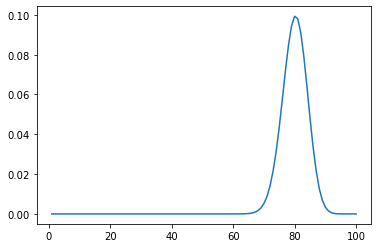

In [4]:
n = 100
p = 0.8
x = np.arange(1, n + 1)
y = [binom_prob(n, i, p) for i in x]
plt.plot(x, y)
plt.show()

___

2. Вероятность того, что лампочка перегорит в течение первого дня эксплуатации, равна 0.0004. В жилом комплексе после ремонта в один день включили 5000 новых лампочек. Какова вероятность, что ни одна из них не перегорит в первый день? Какова вероятность, что перегорят ровно две?

Воспользуемся распределением Пуассона:  

$$ P_m \approx \frac{\lambda^m}{m!}{e}^{-\lambda} $$  

где $ \lambda = np $  

В нашем случае  

$ p = 0.0004 $  
$ n = 5000 $  

Отсюда,

$ \lambda = 2 $

Ни одна не перегорит с вероятностью  

$ P_0 \approx \frac{2^0}{0!}{e}^{-2} \approx 0.135 $  

Ровно две перегорят с вероятностью  

$ P_2 \approx \frac{2^2}{2!}{e}^{-2} \approx 0.270 $  


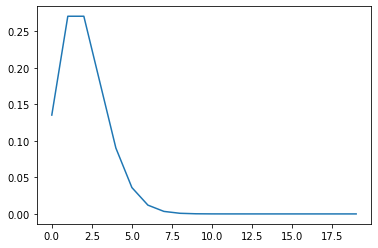

In [5]:
p = 0.0004
n = 5000
lmb = n * p
x = np.arange(0, 20)
y = ((lmb ** x)/factorial(x))*np.exp(-lmb)
plt.plot(x, y)
plt.show()

___

3. Монету подбросили 144 раза. Какова вероятность, что орел выпадет ровно 70 раз?

Формула биномиального распределения в случае события с 0.5 вероятностью принимает вид:  

$$ P_k = C_n^k \cdot p^k \cdot q^{n-k} = C_n^k \cdot (\frac{1}{2})^k \cdot (\frac{1}{2})^{n-k} = C_n^k \cdot (\frac{1}{2})^{k+n-k} = C_n^k \cdot \frac{1}{2^n} $$  

$ P_{70} = C_{144}^{70}\cdot\frac{1}{2^{144}} \approx 0.0628 $

In [6]:
binom_prob(144, 70, 0.5)

0.06281178035144776

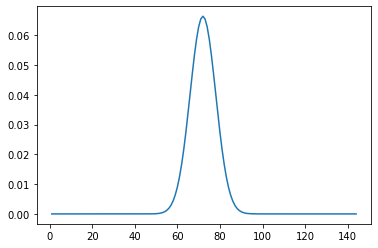

In [7]:
n = 144
p = 0.5
x = np.arange(1, n + 1)
y = [binom_prob(n, i, p) for i in x]
plt.plot(x, y)
plt.show()

___

4. В первом ящике находится 10 мячей, из которых 7 - белые. Во втором ящике - 11 мячей, из которых 9 белых. Из каждого ящика вытаскивают случайным образом по два мяча. 
- Какова вероятность того, что все мячи белые? 
- Какова вероятность того, что ровно два мяча белые? 
- Какова вероятность того, что хотя бы один мяч белый?

Вероятность, что все мячи белые состоит из вероятности вытащить 2 белых мяча из первой корзины и 2 белых мяча из второй.  

- Вероятность вытащить 2 белых мяча из первой корзины будет равна: $ \frac{7}{10} \cdot \frac{6}{9} = \frac{7}{15} $
- Вероятность вытащить 2 белых мяча из второй корзины будет равна: $ \frac{9}{11} \cdot \frac{8}{10} = \frac{36}{55} $  

Отсюда, вероятность, что все мячи белые будет  

$ \frac{7}{15}\cdot\frac{36}{55} = \frac{252}{825} = \frac{84}{275} \approx 0.305 $  

Либо, пользуясь формулой $C_n^k$  

$ \frac{C_7^2 \cdot C_3^0}{C_{10}^2} \cdot \frac{C_9^2 \cdot C_2^0}{C_{11}^2} $

Вероятность того, что ровно два мяча белые, состоит из вероятности  
- что два белых мяча из первой корзины и ни одного из второй  
- один белый мяч из первой корзины и один из второй  
- ни одного из первой корзины и два из второй  

$ \frac{C_7^2 \cdot C_3^0}{C_{10}^2} \cdot \frac{C_9^0 \cdot C_2^2}{C_{11}^2} + \frac{C_7^1 \cdot C_3^1}{C_{10}^2} \cdot \frac{C_9^1 \cdot C_2^1}{C_{11}^2} + \frac{C_7^0 \cdot C_3^2}{C_{10}^2} \cdot \frac{C_9^2 \cdot C_2^0}{C_{11}^2} = \frac{\frac{7!}{2!5!}}{\frac{10!}{2!8!}} \cdot \frac{1}{\frac{11!}{2!9!}}+\frac{\frac{7!}{6!} \cdot \frac{3!}{2!}}{\frac{10!}{2!8!}} \cdot \frac{\frac{9!}{8!}\cdot 2}{\frac{11!}{2!9!}}+\frac{\frac{3!}{2!}}{\frac{10!}{2!8!}} \cdot \frac{\frac{9!}{2!7!}}{\frac{11!}{2!9!}} = \frac{7!}{2!5!} \cdot \frac{2!8!}{10!}\cdot \frac{2!9!}{11!}+\frac{7!3!}{6!2!}\cdot\frac{2!8!}{10!}\cdot\frac{2\cdot 9!}{8!}\cdot\frac{2!9!}{11!}+\frac{3!}{2!}\cdot\frac{2!8!}{10!}\cdot\frac{9!}{2!7!}\cdot\frac{2!9!}{11!} = \frac{2!7!8!9!}{5!10!11!}+\frac{4 \cdot 3!7!9!9!}{6!10!11!}+\frac{3!8!9!9!}{7!10!11!} = \frac{7}{825}+\frac{42}{275}+\frac{12}{275} = \frac{7+3 \cdot 42+3 \cdot 12}{825} = \frac{169}{825} \approx 0.205$

Вероятность того, что хотя бы один мяч белый состоит из:  

- мы вытащили 1 белый мяч и 3 другого цвета 
- мы вытащили 2 белых мяча и 2 другого цвета (эту вероятность мы нашли во втором случае)
- мы вытащили 3 белых мяча и 1 прочих цветов 
- мы вытащили 4 белых мяча (эту вероятность мы нашли в первом случае)

Вероятность вытащить ровно один белый мяч равна:  

$ \frac{C_7^1C_3^1}{C_{10}^2}\cdot\frac{C_9^0C_2^2}{C_{11}^2}+\frac{C_7^0C_3^2}{C_{10}^2}\cdot\frac{C_9^1C_2^1}{C_{11}^2} $

Вероятность вытащить 3 белых мяча равна:  

$ \frac{C_7^2C_3^0}{C_{10}^2}\cdot\frac{C_9^1C_2^1}{C_{11}^2}+\frac{C_7^1C_3^1}{C_{10}^2}\cdot\frac{C_9^2C_2^0}{C_{11}^2} $

Общая вероятность вытащить хотя бы один белый мяч равна:  

$ \bigg(\frac{C_7^1C_3^1}{C_{10}^2}\cdot\frac{C_9^0C_2^2}{C_{11}^2}+\frac{C_7^0C_3^2}{C_{10}^2}\cdot\frac{C_9^1C_2^1}{C_{11}^2}\bigg)+\bigg(\frac{C_7^2 \cdot C_3^0}{C_{10}^2} \cdot \frac{C_9^0 \cdot C_2^2}{C_{11}^2} + \frac{C_7^1 \cdot C_3^1}{C_{10}^2} \cdot \frac{C_9^1 \cdot C_2^1}{C_{11}^2} + \frac{C_7^0 \cdot C_3^2}{C_{10}^2} \cdot \frac{C_9^2 \cdot C_2^0}{C_{11}^2}\bigg)+\bigg(\frac{C_7^2C_3^0}{C_{10}^2}\cdot\frac{C_9^1C_2^1}{C_{11}^2}+\frac{C_7^1C_3^1}{C_{10}^2}\cdot\frac{C_9^2C_2^0}{C_{11}^2}\bigg)+\bigg(\frac{C_7^2 \cdot C_3^0}{C_{10}^2} \cdot \frac{C_9^2 \cdot C_2^0}{C_{11}^2}\bigg) $

Вычисление такой формулы достаточно трудоемкая задача, поэтому мы можем пойти от обратного, найти вероятность того, что ни одного белого мяча не будет вытащено и вычесть эту вероятность из 1

$ \frac{C_7^0C_3^2}{C_{10}^2}\cdot\frac{C_9^0C_2^2}{C_{11}^2} = \frac{\frac{3!}{2!}}{\frac{10!}{2!8!}}\cdot \frac{1}{\frac{11!}{2!9!}} = \frac{3!}{2!}\cdot \frac{2!8!}{10!} \cdot \frac{2!9!}{11!} = \frac{2!3!8!9!}{10!11!} = \frac{2 \cdot 2 \cdot 3}{9 \cdot 10 \cdot 10 \cdot 11} = \frac{1}{3 \cdot 5 \cdot 5 \cdot 11} = \frac{1}{825} $  

А значит, вероятность вытащить хотя бы один белый мяч будет равна:  

$ 1 - \frac{1}{825} = \frac{824}{825} = 0.9988 $